# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

from IPython.display import display
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
print('>>> ', hospital_read_df.shape)

>>>  (16860, 12)


****
## Preliminary Analysis

In [3]:
### deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available'].copy()
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

In [4]:
print('>>> ', clean_hospital_read_df.shape)
display(clean_hospital_read_df.tail())

>>>  (11578, 12)


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


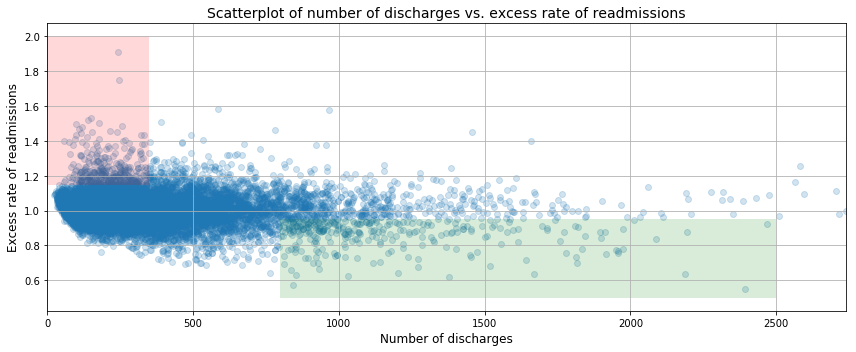

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(12,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work in this notebook and submit to your Github account. 

[A. Do you agree with the above analysis and recommendations? Why or why not?](#A.-Do-you-agree-with-the-above-analysis-and-recommendations?-Why-or-why-not?)
   
[B. Provide support for your arguments and your own recommendations with a statistically sound analysis:](#B.-Provide-support-for-your-arguments-and-your-own-recommendations-with-a-statistically-sound-analysis)

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## <font color='blue'>A. Do you agree with the above analysis and recommendations? Why or why not?</font>

All 3 **initial observations** are accurate, including the rate of readmissions trending down. The linear regression line plotted below confirms this:

In [6]:
def plot_linear_reg(x, y):
    m, b = np.polyfit(x, y, deg=1)   # compute linear regression: m=slope, b=y_intercept

    fig, ax = plt.subplots(figsize=(12,5))
    ax.scatter(x, y,alpha=0.2)
    ax.plot(x, m * x + b, color='red')

    ax.set_xlim([0, max(x)])
    ax.set_xlabel('Number of discharges', fontsize=12)
    ax.set_ylabel('Excess rate of readmissions', fontsize=12)
    ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

    ax.grid(True)
    fig.tight_layout()
    
    return (m, b)  

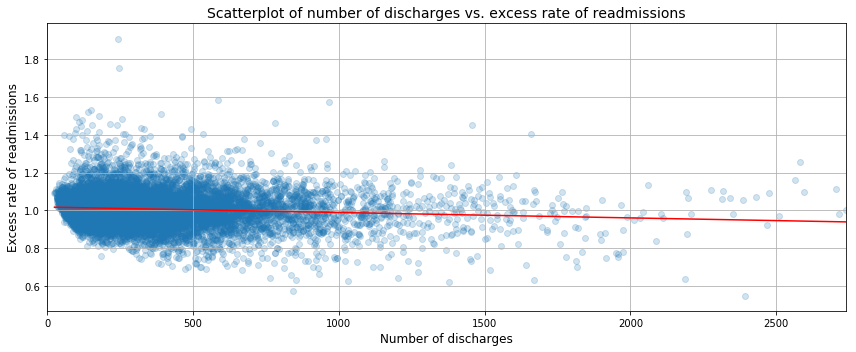

>>> slope= -2.85650529438e-05 	y_intercept= 1.01794755795


In [7]:
# convert list to numpy.ndarray
x = np.array(x)

m, b = plot_linear_reg(x, y)

plt.show()
print('>>> slope=', m, '\ty_intercept=', b)

It's important to note that the data displayed on the plot above is the same as in the original plot. Unfortunately, this is not all the data from the dataset. This is a shorter sample that was sliced using *magic numbers* and the exercise didn't offer any explanations for this. After carefully analysis of the code, it seems that this was an attempt to discard outliers from being plotted and to make the plot more user-friendly.

On our study, we use all the data provided by `clean_hospital_read_df` to do the analysis. Rows that have *NaN* values are dropped. This means that our statistics and plot results are expected to be a little bit different visually.

With this in mind, the **statistics** shared in preliminary report need to be adjusted! These are the updated statements:
* Hospitals/facilities with number of discharges < 100, have a mean excess readmission rate of **1.023**. However, **59.2 %** (not  63%) have excess readmission rate greater than 1;
* Hospitals/facilities with number of discharges > 1000, have a mean excess readmission rate of **0.978**. However, **44.5 %** (not 44%) have excess readmission rate greater than 1;

In [8]:
# Test this information:
# In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 
# 63% have excess readmission rate greater than 1 
hospitals_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]

mean_err = hospitals_df['Excess Readmission Ratio'].mean() # err = excess readmission rate
print('>>> hospitals/facilities with number of discharges < 100, mean excess readmission rate is:', round(mean_err, 3))

hospitals_err_gt1_df = hospitals_df[hospitals_df['Excess Readmission Ratio'] > 1]                 
percent_greater_than_1_err = hospitals_err_gt1_df.shape[0] / hospitals_df.shape[0] * 100                                 
print('>>> and', round(percent_greater_than_1_err, 1) , '% have excess readmission rate greater than 1')

# Test this information:
# In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 
# 44% have excess readmission rate greater than 1 
hospitals_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]

mean_err = hospitals_df['Excess Readmission Ratio'].mean() # err = excess readmission rate
print('\n>>> hospitals/facilities with number of discharges > 1000, mean excess readmission rate is:', round(mean_err, 3))

hospitals_err_gt1_df = hospitals_df[hospitals_df['Excess Readmission Ratio'] > 1]                 
percent_greater_than_1_err = hospitals_err_gt1_df.shape[0] / hospitals_df.shape[0] * 100                                 
print('>>> and', round(percent_greater_than_1_err, 1) , '% have excess readmission rate greater than 1')

>>> hospitals/facilities with number of discharges < 100, mean excess readmission rate is: 1.023
>>> and 59.2 % have excess readmission rate greater than 1

>>> hospitals/facilities with number of discharges > 1000, mean excess readmission rate is: 0.978
>>> and 44.5 % have excess readmission rate greater than 1


The **conclusions** from the preliminary report were:
> - There is a significant correlation between hospital capacity (number of discharges) and readmission rates.
> - Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

The regression line has a very light downward trend which means that there *might be* a weak correlation between *hospital capacity* and *readmission rates*. Nevertheless, further investigation is required to reach such a conclusion.

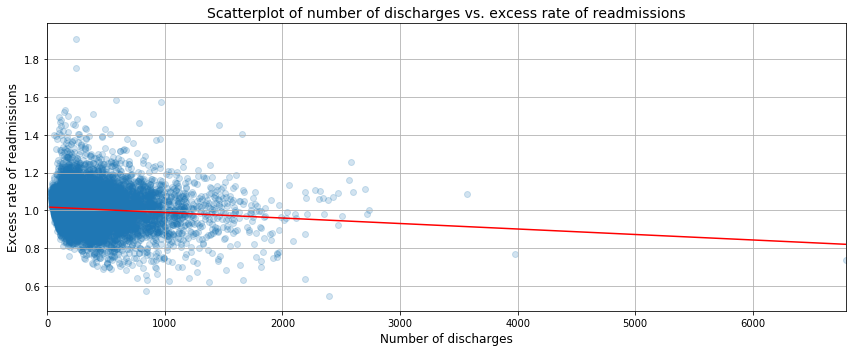

>>> slope= -2.90105173306e-05 	y_intercept= 1.01810614737


In [9]:
# First, strip down the dataframe to store only these 2 columns
df = clean_hospital_read_df.loc[:, ['Number of Discharges', 'Excess Readmission Ratio']]

# Handle NaN values in "Excess Readmission Ratio": drop them completely or replace NaN for 0
# We choose to drop them because replacing by 0 leads to a very different linear regression result
df = df.dropna()
#df['Excess Readmission Ratio'].replace(np.NaN, 0, inplace=True) 

# define (x, y) for simplicity
x = df['Number of Discharges'].values
y = df['Excess Readmission Ratio'].values

# plot linear regression line
m, b = plot_linear_reg(x, y)

plt.show()
print('>>> slope=', m, '\ty_intercept=', b)

This regression line describes the following relationship: for every new patient discharged, we can expect a decrease of **0.00002901** patients in readmission. The `y_intercept` **1.018** describes the average readmission rate when the number of discharges is zero.

As for the **regulatory policy recommendations**, I leave this part for the experts and authorities on hospital readmissions.

## <font color='blue'>B. Provide support for your arguments and your own recommendations with a statistically sound analysis</font>
### <font color='blue'>B1. Setup an appropriate hypothesis test.</font>

The hypotheses tests if the population correlation coefficient (ρ) shows a strong linear relationship between *hospital capacity* (i.e. number of discharges) and *readmission rates*:

- H0: There is no correlation between the *number of discharges* and *readmission rates* (`ρ = 0`)
- HA: There is a significant correlation between the *number of discharges* and *readmission rates* (`ρ <> 0`)

###  <font color='blue'>B2. Compute and report the observed significance value (or p-value)</font>

In [10]:
# To speed things up, SciPy calculates a Pearson correlation coefficient and the p-value.
# The pearson correlation coeficient is the comparison of the variability on the data due to codependence 
#   (aka. covariance) to the variability inherent in each variable independently (std deviations). 
# It ranges from -1 (anticorrelation) to +1 (complete positive correlation). 
import scipy
r, p_value = scipy.stats.pearsonr(x, y)

print('>>> pearson cc =', r)
print('>>> p-value    =', p_value)

>>> pearson cc = -0.0973979435108
>>> p-value    = 1.22254737768e-25


The *pearson correlation coefficient* (**-0.097**) is very close to zero. The value zero would indicate no significant correlation between the variables. However, the `p-value` is incredibly small (**0.000000000000000000000000122254737768**), much smaller than the significance level of **0.05**.

Thus, we must **reject the null hypothesis** in favor of the alternative: there is a significant correlation between the variables.

###  <font color='blue'>B3. Report statistical significance for  α  = .01</font>

Our result remains the same. The `p-value` is still much smaller than **0.01**.

###  <font color='blue'>B4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?</font>

Our findings conclude that there is some correlation between *number of discharges* and *rate of admissions*. However, the *pearson correlation coefficient* for this test ended up being so close to zero that one could argue that the connection between these variables is too weak to justify the effort and investment required to implement the policy recommendations suggested.

The current theory for the existing correlation between these variables is:
- Bigger hospitals are responsible for the highest numbers of discharges;
- Higher numbers of discharges mean that the hospital is able to take care of larger amounts of patients;
- Bigger hospitals must have more resources than smaller hospitals to be able to handle more patients;
- The more resources a hospital has, the more likely it is to provide a better diagnose and treatment, thus reducing the rate of readmissions;

If this theory is true, policy recommendations that improve the protocols for better diagnose and treatment should be investigated. It would be also helpful to identify what are the most common causes/problems that make a patient come back for readmission and consider the possibility of investing in equipment/staff for the hospital and be able to handle these common problems in a more definitive way.

###  <font color='blue'>B5. Look at the scatterplot</font>
> - What are the advantages and disadvantages of using this plot to convey information?
> - Construct another plot that conveys the same information in a more direct manner.

The scatter plot makes it easy to visualize the data points to get a better intuition about the relationship between variables and easily identify a trend line. 

On the other hand, when large amounts of data points are concentrated in the same area they can overlap each other and hide the density.

An alternative visualization method is `hexbin()`: a 2-D histogram with hexagonal cells. It displays data in 2D using hexagonal tiling for bining and gives a better feedback of the density of the points. It's really useful when the scatter plot is too dense to interpret.

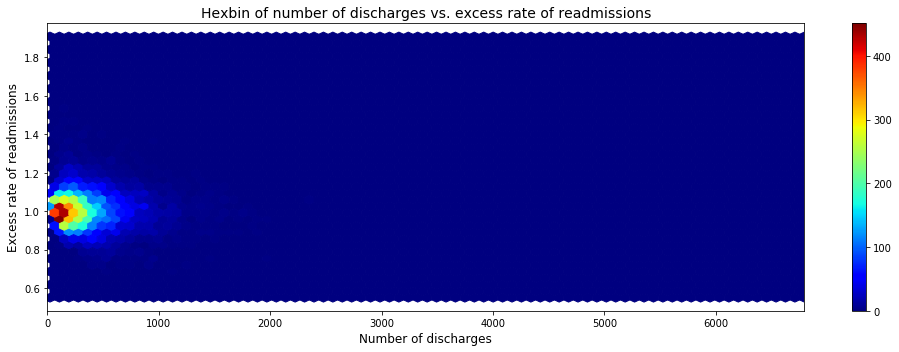

In [11]:
fig, ax = plt.subplots(figsize=(14,5))

h = ax.hexbin(x, y, gridsize=(80, 20), cmap='jet') # binary, inferno
fig.colorbar(h, ax=ax)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Hexbin of number of discharges vs. excess rate of readmissions', fontsize=14)
  
fig.tight_layout()    
plt.show()